In [2]:
import sympy
from sympy import *
init_printing()
from IPython.display import display

# Beam Segment Equations

Loading along a beam is not always mathematically continuous.  Concentrated forces and moments, as well as starting and ending points of distributed loads interupt the mathematical continuity of the beam.  For this reason, it is convenient to segment the beam between discontinuities to form a series of mathematically continuous segments. This allows for the direct calculation of maximum/minimum forces, rotations, and deflections in each segment.

## Linear Distributed Load Equation

The equation for a linear distributed load is expressed as follows:

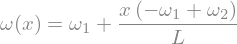

In [3]:
w, w1, w2, x, L = symbols('omega, omega_1, omega_2, x, L')
w = w1+(w2-w1)/L*x
display(Eq(symbols('\\omega(x)'), w))

Where:

$\omega_1=$ magnitude of distributed load at starting point

$\omega_2=$ magnitude of distributed laod at ending point

$x_1=$ distributed load starting point

$x_2=$ distributed load ending point

## Shear Force Equation
The change in the shear force is equal to the area under (or integral of) the load diagram. If the shear force at the start of the segment, $V_1$, is known, the shear force at any point, $x$, relative to the start of the segment can be expressed as:

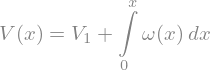

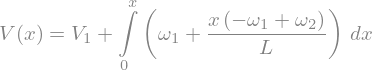

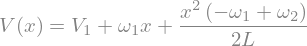

V_1 + omega_1*x + x**2*(-omega_1 + omega_2)/(2*L)


In [4]:
V1 = symbols('V_1')
V = V1 + integrate(w, (x, 0, x))
display(Eq(symbols('V(x)'), V1 + Integral(symbols('\\omega(x)'), (x, 0, x))))
display(Eq(symbols('V(x)'), V1 + Integral(w, (x, 0, x))))
display(Eq(symbols('V(x)'), V))
print(V)

## Moment Equation

Similarly, the change in the moment diagram is equal to the area under the shear diagram. If the moment at the start of the segment, $M_1$, is known, the moment at any point, $x$, relative to the start of the segment can be expressed as:

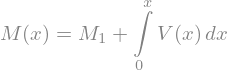

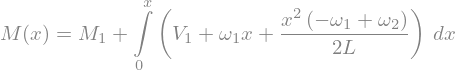

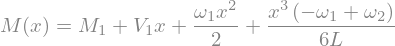

M_1 + V_1*x + omega_1*x**2/2 + x**3*(-omega_1 + omega_2)/(6*L)


In [5]:
M1 = symbols('M_1')
M = M1 + integrate(V, (x, 0, x))
display(Eq(symbols('M(x)'), M1 + Integral(symbols('V(x)'), (x, 0, x))))
display(Eq(symbols('M(x)'), M1 + Integral(V, (x, 0, x))))
display(Eq(symbols('M(x)'), M))
print(M)

## Slope Equation
The slope of the elastic curve, $\theta$, can be obtained by integrating the moment diagram and dividing by the flexural rigidity, $EI$.

$\theta_1=$ slope (or rotation) at the start of the segment

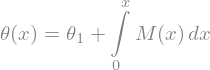

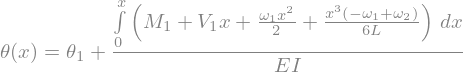

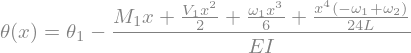

theta_1 - (M_1*x + V_1*x**2/2 + omega_1*x**3/6 + x**4*(-omega_1 + omega_2)/(24*L))/(E*I)


In [6]:
theta1, E, I = symbols('theta_1, E, I')
theta = theta1 - 1/(E*I)*integrate(M, (x, 0, x))
display(Eq(symbols('\\theta(x)'), theta1 + Integral(symbols('M(x)'), (x, 0, x))))
display(Eq(symbols('\\theta(x)'), theta1 + Integral(M, (x, 0, x))/(E*I)))
display(Eq(symbols('\\theta(x)'), theta))
print(theta)

## Deflection Equation
Integrating one more time gives us the equation for the deflection along the segment.

$\Delta_1=$ Deflection at the start of the segment

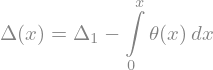

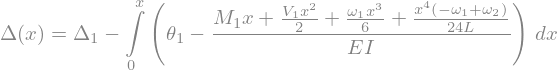

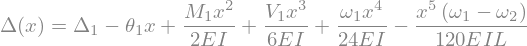

Delta_1 - theta_1*x + M_1*x**2/(2*E*I) + V_1*x**3/(6*E*I) + omega_1*x**4/(24*E*I) - x**5*(omega_1 - omega_2)/(120*E*I*L)


In [7]:
Delta1 = symbols('Delta_1')
Delta = Delta1 - integrate(theta, (x, 0, x))
display(Eq(symbols('\\Delta(x)'), Delta1 - Integral(symbols('\\theta(x)'), (x, 0, x))))
display(Eq(symbols('\\Delta(x)'), Delta1 - Integral(theta, (x, 0, x))))
display(Eq(symbols('\\Delta(x)'), Delta))
print(Delta)

## Using the Equations
Each of the equations derived above requires knowledge of the initial conditions at the start of the segment ($V_1$, $M_1$, $\theta_1$, or $\Delta_1$).  An analysis will need to be performed to determine these values at the start of the beam.

The initial conditions at the start of the beam are the same as those at the start of the first segment.  If the initial conditions at the start of the first segment of the beam are known, the conditions at the start of the second segment can be found by calculating the conditions at the end of the first segment (from the equations with $x=L$) and adding any concentrated loads that may be at the junction between segments.  Likewise, the initial conditions for the third segment can be derived from the second segment, and so on until the last segment.  Any concentrated loads at the end of the last segment (including reactions) will need to be added to get shear and moment diagrams to close.


## Calculating $\theta_1$

For finite element solutions, the rotation $\theta_1$ at the start of the beam might be known. However, if end releases have been applied to the member (e.g. members with hinges at one or both ends), then either $\theta_1$ or $\theta_2$ or both will not be known. These terms will be lost when the stiffness matrix is condensed to simulate the end releases. In this situation the slope-deflection equation may be used to solve for $\theta_1$ as follows (since $M_1$, $M_2$, $\Delta_1$, $\Delta_2$, $FEM_1$, & $FEM_2$ will be known). The basic slope-deflection equation is:

$M_{nf}=\frac{2EI}{L}(2\theta_n+\theta_f-3\psi)+FEM_{nf}$

Substituting in appropriate values for each end of the segment yields the following equations:

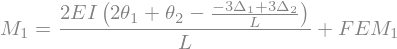

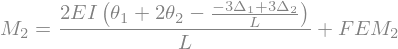

In [8]:
M1, M2, E, I, L, theta1, theta2, Delta1, Delta2 = symbols('M_1, M_2, E, I, L, theta_1, theta_2, Delta_1, Delta_2')
FEM1, FEM2 = symbols('FEM_1, FEM_2')
M1 = 2*E*I/L*(2*theta1 + theta2 - 3*(Delta2-Delta1)/L) + FEM1
M2 = 2*E*I/L*(2*theta2 + theta1 - 3*(Delta2-Delta1)/L) + FEM2
display(Eq(symbols('M_1'), M1))
display(Eq(symbols('M_2'), M2))

Solving the equation $M_2$ slope-deflection equation for $\theta_2$ gives:

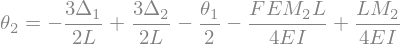

In [9]:
theta2 = solve(M2 - symbols('M_2'), theta2)[0]
display(Eq(symbols('\\theta_2'), expand(theta2)))

Substituting $\theta_2$ back into the slope-deflection equation for $M_1$ gives:

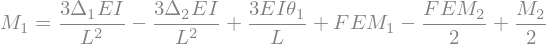

In [10]:
M1 = M1.subs('theta_2', theta2)
display(Eq(symbols('M_1'), expand(M1)))

Solving this new equation for $\theta_1$ gives:

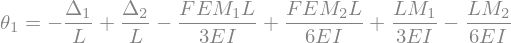

(E*I*(-Delta_1 + Delta_2) + L**2*(-2*FEM_1 + FEM_2 + 2*M_1 - M_2)/6)/(E*I*L)


In [11]:
theta1 = solve(M1 - symbols('M_1'), theta1)[0]
display(Eq(symbols('\\theta_1'), expand(theta1)))
print(theta1)

## Finding Max and Min Values

The points of max/min shear can be found by setting the derivative of the equation for shear equal to zero. Ther derivative of the shear force is:

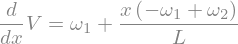

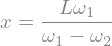

L*omega_1/(omega_1 - omega_2)


In [12]:
display(Eq(Derivative(symbols('V'), x), diff(V, x)))
display(Eq(symbols('x'), solve(diff(V, x), symbols('x'))[0]))
print(solve(diff(V, x), symbols('x'))[0])

The points of max/min moment can be found by setting the derivative of the equation for moment equal to zero. The derivative of the moment is:

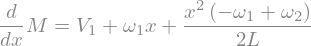

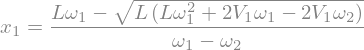

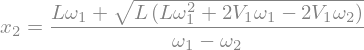

(L*omega_1 - sqrt(L*(L*omega_1**2 + 2*V_1*omega_1 - 2*V_1*omega_2)))/(omega_1 - omega_2)
(L*omega_1 + sqrt(L*(L*omega_1**2 + 2*V_1*omega_1 - 2*V_1*omega_2)))/(omega_1 - omega_2)


In [13]:
display(Eq(Derivative(symbols('M'), x), diff(M, x)))
display(Eq(symbols('x_1'), solve(diff(M, x), symbols('x'))[0]))
display(Eq(symbols('x_2'), solve(diff(M, x), symbols('x'))[1]))
print(solve(diff(M, x), symbols('x'))[0])
print(solve(diff(M, x), symbols('x'))[1])